In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import matplotlib.font_manager as fm
import matplotlib

font_path='C:\\Windows\\Fonts\\gulim.ttc'
font=fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

# 전처리

In [75]:
# 데이터 로드
bank_df=pd.read_csv('../../data/BankChurners.csv')
bank_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [76]:
# 의미 없는 데이터 열 제거
bank_df.drop([
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ],axis=1,inplace=True)

In [77]:
# 데이터 결측치 확인
bank_df.info()

# 데이터 통계
bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


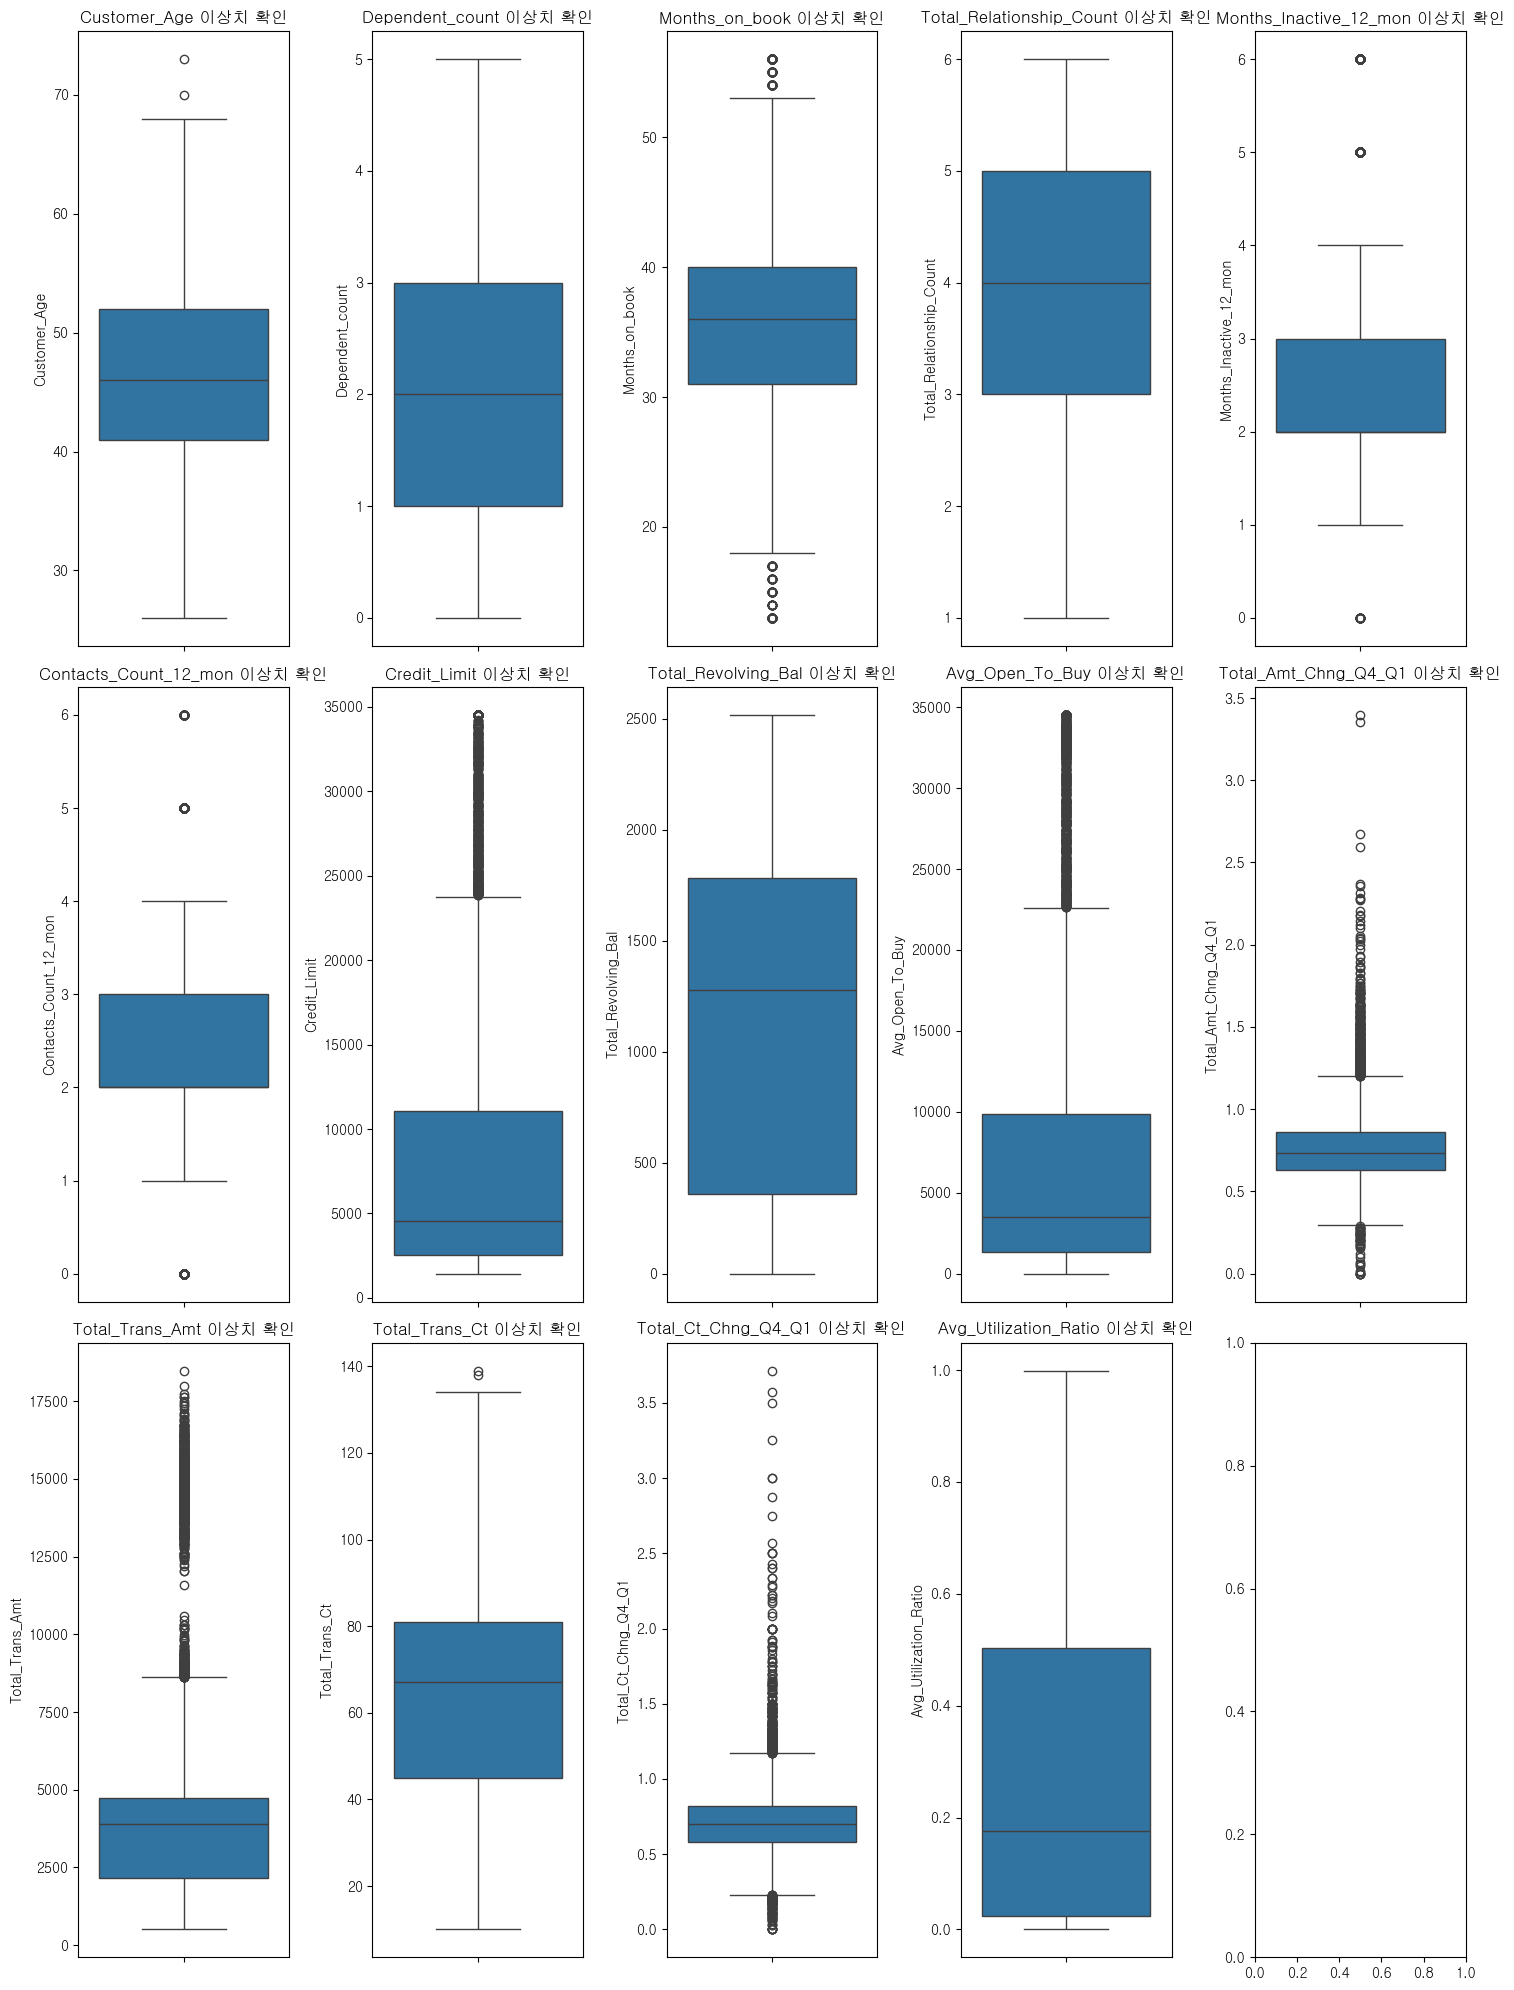

In [78]:
# 정수, 실수형 데이터 이상치 확인
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 20))  
axes = axes.flatten()

cols=bank_df.select_dtypes(include=['int64','float64']).columns

for i, col in enumerate(cols):
    sns.boxplot(y=bank_df[col], ax=axes[i])
    axes[i].set_title(f"{col} 이상치 확인")

plt.tight_layout()
plt.show()

In [79]:
# 각 열 데이터 값 종류 확인
for col in  bank_df.columns:
    count=0
    print(f'{col} : ',end='')
    for value in bank_df[col].unique():
        if count<10:
            print(f"'{value}'",end=',')
            count+=1
        else:
            print('10개 이상 존재...',end='')
            break
    print('\n')

Attrition_Flag : 'Existing Customer','Attrited Customer',

Customer_Age : '45','49','51','40','44','32','37','48','42','65',10개 이상 존재...

Gender : 'M','F',

Dependent_count : '3','5','4','2','0','1',

Education_Level : 'High School','Graduate','Uneducated','Unknown','College','Post-Graduate','Doctorate',

Marital_Status : 'Married','Single','Unknown','Divorced',

Income_Category : '$60K - $80K','Less than $40K','$80K - $120K','$40K - $60K','$120K +','Unknown',

Card_Category : 'Blue','Gold','Silver','Platinum',

Months_on_book : '39','44','36','34','21','46','27','31','54','30',10개 이상 존재...

Total_Relationship_Count : '5','6','4','3','2','1',

Months_Inactive_12_mon : '1','4','2','3','6','0','5',

Contacts_Count_12_mon : '3','2','0','1','4','5','6',

Credit_Limit : '12691.0','8256.0','3418.0','3313.0','4716.0','4010.0','34516.0','29081.0','22352.0','11656.0',10개 이상 존재...

Total_Revolving_Bal : '777','864','0','2517','1247','2264','1396','1677','1467','1587',10개 이상 존재...

Avg_Open_To_Bu

In [80]:
# 각 범주형 데이터 열별 데이터 개수 확인
cols=bank_df.select_dtypes(include='object').columns
for col in cols:
    print(bank_df[col].value_counts(),'\n')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 

Gender
F    5358
M    4769
Name: count, dtype: int64 

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



In [81]:
# 이탈 여부 라벨 인코딩
bank_df['Attrition_Flag'] = bank_df['Attrition_Flag'].map({
    'Existing Customer': 0, # 유지자 1
    'Attrited Customer': 1  # 이탈자 1
})

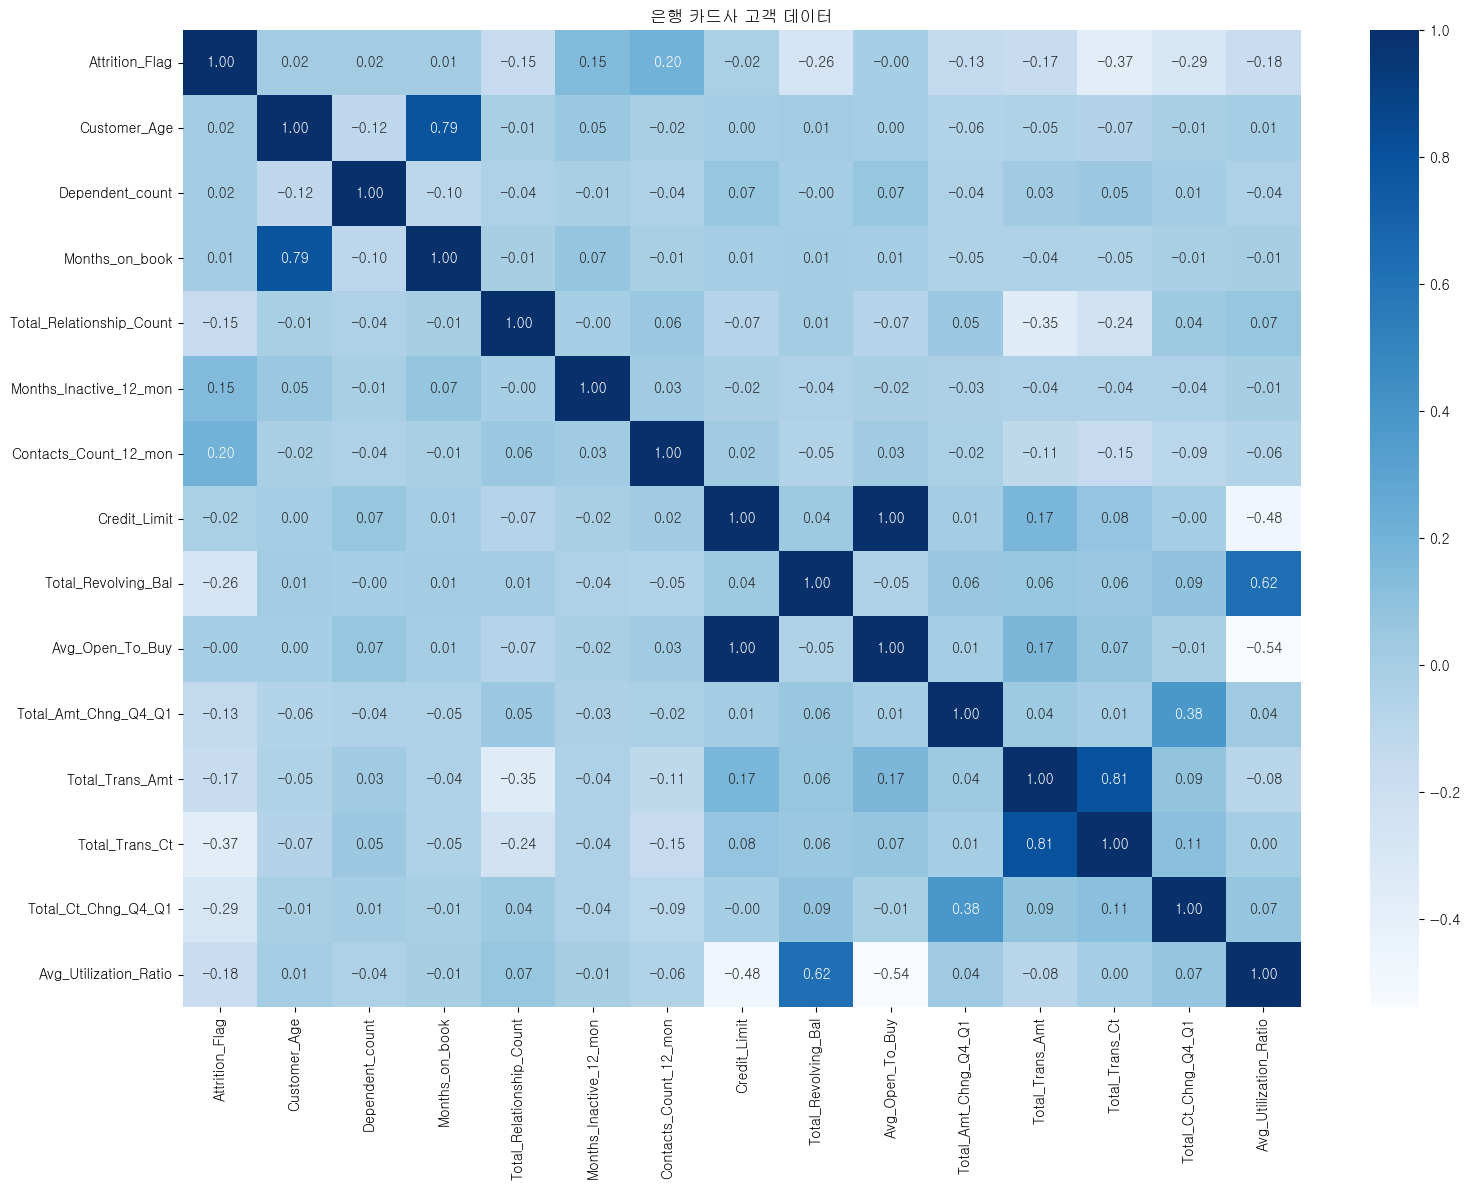

In [82]:
# 데이터셋 히트맵 시각화를 통해 이탈 여부와의 관계 파악
correlation = bank_df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='Blues', annot=True, fmt=".2f")
plt.title("은행 카드사 고객 데이터")
plt.tight_layout()
plt.show()

In [83]:
# 편향 데이터 삭제
bank_df = bank_df.loc[:, ~bank_df.columns.str.startswith("Total_")]

In [84]:
# 라벨 인코딩(데이터의 순서 o): 이탈 여부, 성별, 교육 수준
# 원 핫 인코딩(데이터의 순서 x): 결혼 여부, 소득수준, 카드종류

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
OHe=OneHotEncoder()

# 라벨 인코딩
le_cols=['Gender' ]
for col in le_cols:
    bank_df[col]=le.fit_transform(bank_df[col])

# 원 핫 인코딩
OHe_cols=['Education_Level','Marital_Status', 'Income_Category', 'Card_Category']
bank_df = pd.get_dummies(bank_df, columns=OHe_cols, drop_first=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_28600\650751138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df[col]=le.fit_transform(bank_df[col])


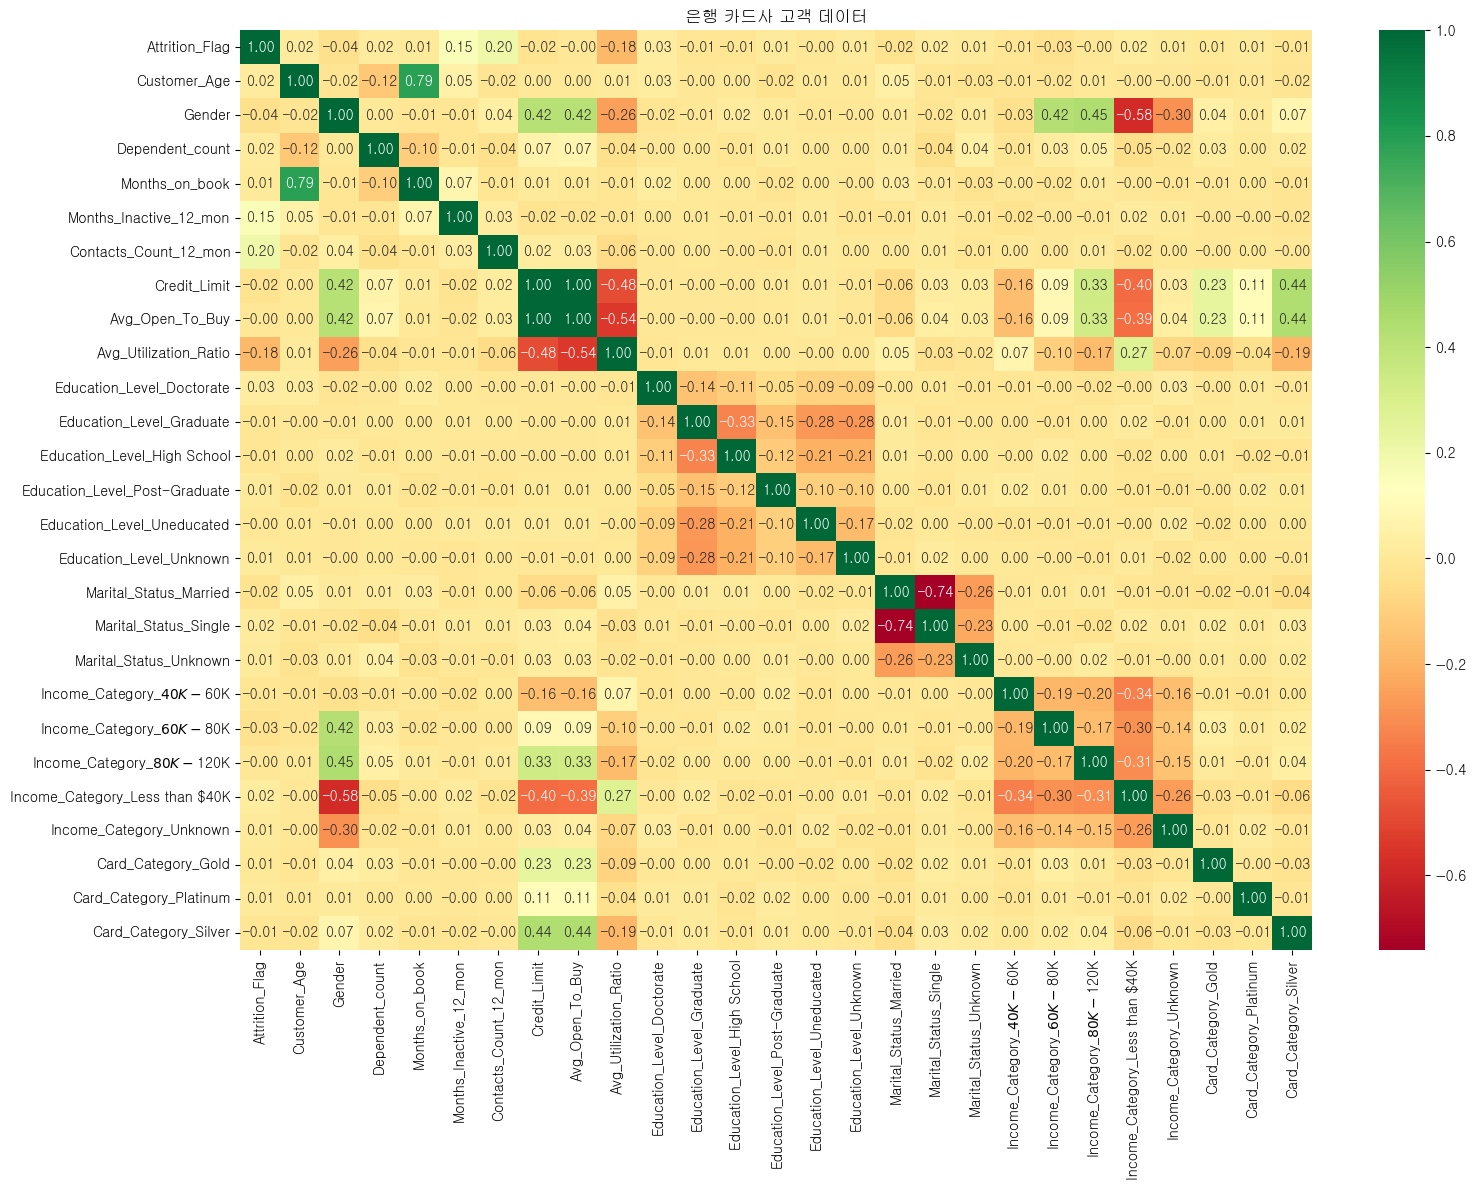

In [85]:
# 인코딩 후 데이터셋 히트맵 시각화
correlation = bank_df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='RdYlGn', annot=True, fmt=".2f")
plt.title("은행 카드사 고객 데이터")
plt.tight_layout()
plt.show()

# 학습

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# 학습, 타겟 분리
X = bank_df.drop(columns=["Attrition_Flag"])
y = bank_df["Attrition_Flag"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1701
           1       0.62      0.13      0.21       325

    accuracy                           0.85      2026
   macro avg       0.74      0.56      0.56      2026
weighted avg       0.82      0.85      0.80      2026



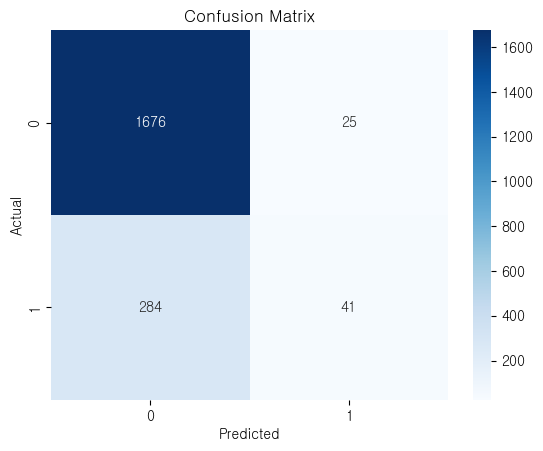

In [87]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1701
           1       0.61      0.22      0.33       325

    accuracy                           0.85      2026
   macro avg       0.74      0.60      0.62      2026
weighted avg       0.83      0.85      0.82      2026



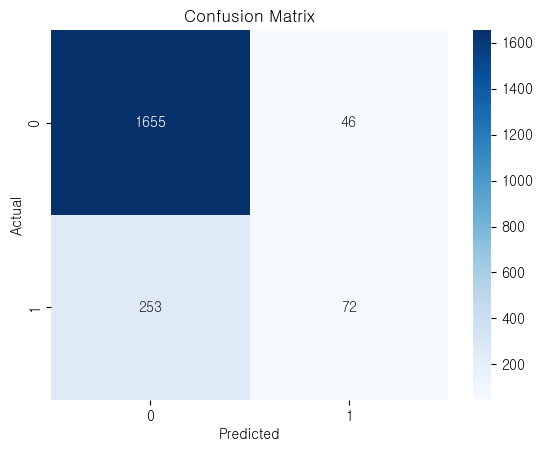

In [88]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1701
           1       0.57      0.37      0.45       325

    accuracy                           0.85      2026
   macro avg       0.73      0.66      0.68      2026
weighted avg       0.84      0.85      0.84      2026



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:44:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


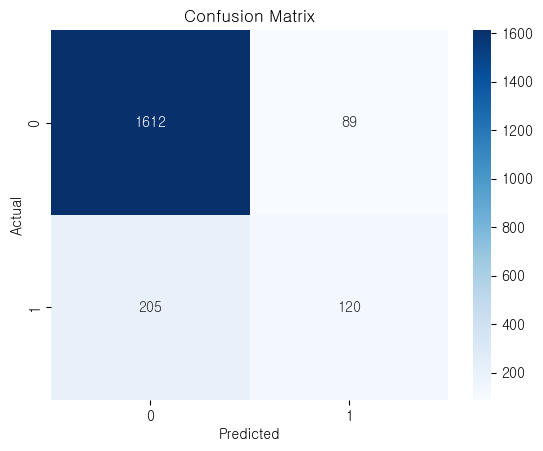

In [89]:
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1701
           1       0.62      0.34      0.44       325

    accuracy                           0.86      2026
   macro avg       0.75      0.65      0.68      2026
weighted avg       0.84      0.86      0.84      2026



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


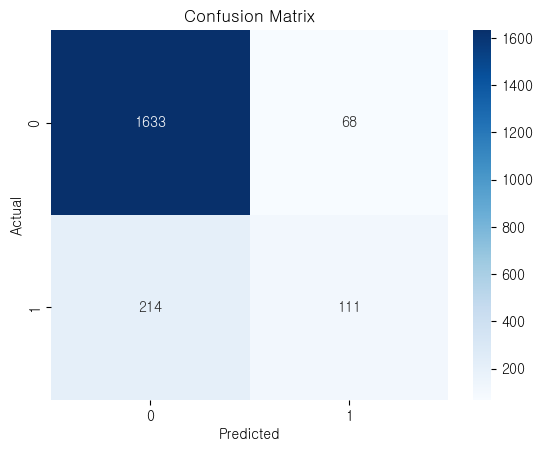

In [90]:
from lightgbm import LGBMClassifier

# LightGBM 모델 학습
lGBM_model = LGBMClassifier(random_state=42)
lGBM_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = lGBM_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 샘플링 및 하이퍼 파라미터 튜닝

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 오버샘플링 적용
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

# 모델 선정
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    'LightGBM' : LGBMClassifier(random_state=42)
}

# 파라미터 설정
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1],                       # 규제 강도
        'penalty': ['l1', 'l2'],               # 규제 유형
        'solver': ['liblinear']                # l1과 l2 모두 지원하는 solver
    },
    "Random Forest": {
        'n_estimators': [100],                          # 트리 개수
        'max_depth': [3, 5],                             # 최대 깊이
        'min_samples_split': [2, 10],                # 노드 분할 최소 샘플 : 값이 클수록 트리가 덜 복잡해져 과적합을 줄이는 효과
        'min_samples_leaf': [1, 4],                  # 리프 노드 최소 샘플 : 값이 크면 모델이 단순 (클래스 불균형이 심하면 크게 설정)
        'max_features': ['sqrt', 'log2', 0.3, 0.5],     # 특성 샘플링 비율 : 각 트리에서 사용할 특성의 최대 개수 (무작위성을 높여 모델의 다양성을 증가)
        'class_weight' : ['balanced']                   # 클래스 가중치 : 클래스 불균형을 해결하기 위해 클래스에 가중치를 부여
    },
    "XGBoost": {
        'n_estimators': [100],                          # 트리 개수
        'max_depth': [3, 5, 7],                        # 최대 깊이 : XGBoost는 깊이가 얕아도 잘 작동한다!
        'learning_rate': [0.01, 0.05, 0.1, 0.3],        # 학습률
        'subsample': [0.6, 0.8, 1.0],                   # 각 트리 학습에 사용할 데이터 샘플 비율 : 값이 낮을수록 과적합 방지
    },
    "LightGBM": {
        'n_estimators': [100],              # 기본값 고정
        'learning_rate': [0.01, 0.1],       # 모델 민감도만 조절
        'max_depth': [3, 5],                # 과적합 조절용 depth만 조절
        'class_weight': ['balanced']        # 클래스 불균형 대응만 유지
    }
}

# 모델 학습 및 평가
for name, model in models.items():
    # 파라미터 학습
    print(f"\nGridSearchCV Search Best Params for {name}..............................")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_resample, y_train_resample)
    
    # 최적 모델 선정
    best_model = grid_search.best_estimator_
    print(f">>>> Best Parameters for {name}\n{grid_search.best_params_}")
    
    # 교차 검증
    print(f"Cross Val Score : {cross_val_score(best_model, X_train_resample, y_train_resample, scoring='f1', cv=5)}")

    # 예측
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값
    
    # 평가 지표 출력
    print(f"{name} ==========")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_proba):.4f}")    
    print(f"\n>>>> Classification Report\n{classification_report(y_test, y_pred)}")

    # 특성 중요도 확인
    if (name == "Logistic Regression"):
        coef_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_[0]})
        print("\n>>>> Feature Coefficients\n", coef_importance.sort_values(by='Coefficient', ascending=False))
    else:
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        print("\n>>>> Feature Importance\n", feature_importance.sort_values(by='Importance', ascending=False))

    print("\n" + "="*100 + "\n")


GridSearchCV Search Best Params for Logistic Regression..............................
Fitting 5 folds for each of 4 candidates, totalling 20 fits
>>>> Best Parameters for Logistic Regression
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Cross Val Score : [0.4070325  0.85786436 0.84796574 0.85968661 0.86528867]
Logistic Regression ==========
Accuracy : 0.7730
Precision : 0.3308
Recall : 0.4062
F1 Score : 0.3646
ROC-AUC : 0.6693

>>>> Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1701
           1       0.33      0.41      0.36       325

    accuracy                           0.77      2026
   macro avg       0.61      0.62      0.61      2026
weighted avg       0.79      0.77      0.78      2026


>>>> Feature Coefficients
                            Feature  Coefficient
16           Marital_Status_Single     1.058607
15          Marital_Status_Married     1.048673
10        Education_Level_Graduate 